**Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection and Processing **


In [ ]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Checking Correlation**

In [ ]:
correlation = gold_data.corr()

<ipython-input-11-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

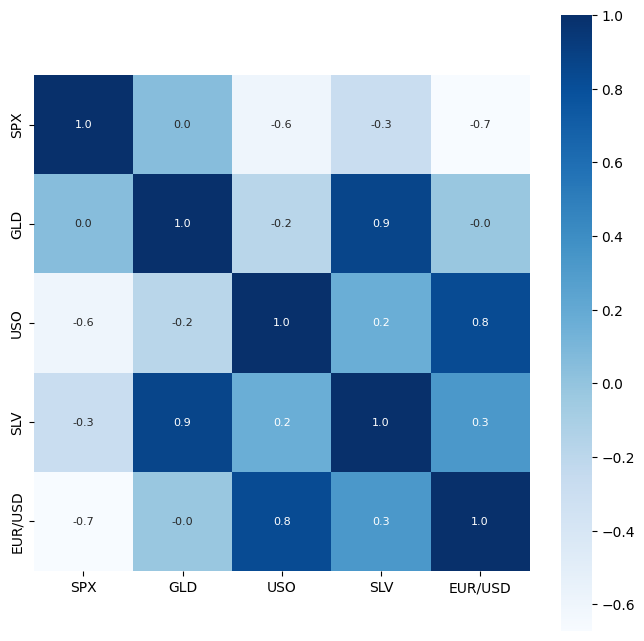

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-18-4569879e3289>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

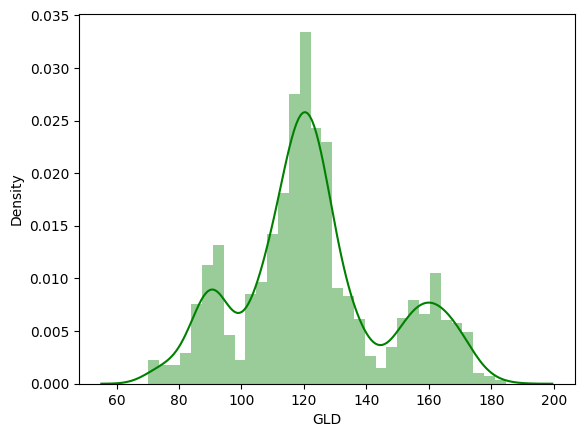

In [ ]:

sns.distplot(gold_data['GLD'],color='green')

**Splitting the Features and Target**

In [ ]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [ ]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [ ]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

**Splitting into Training data and Test Data**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

**Model Training: Random Forest Regressor**

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

**Model Evaluation**

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.33209915  81.68189976 115.91890055 127.43790076 120.78350136
 154.83349713 150.28479871 126.22609991 117.57629888 125.78070098
 116.5456012  171.60940077 141.66859868 167.79529898 115.31039971
 117.63230057 138.360504   170.36320091 159.23150289 159.02119942
 155.03820063 125.34400005 175.92160032 157.17810395 125.23410042
  93.83459974  77.88250026 120.71050011 119.10559912 167.46289941
  88.36130033 125.38530017  91.08470101 117.86839984 121.24739859
 135.89080085 115.45100131 115.00830058 146.79620037 106.97050091
 104.65540251  87.09089785 126.58980036 118.04709999 153.50189929
 119.74599998 108.39310032 107.92229802  93.2776004  127.13479771
  74.94850047 113.65259945 121.31689992 111.34489881 118.71859881
 120.63709941 158.77520072 165.62300154 146.8122964   85.68299854
  94.18510017  86.91609902  90.55579993 119.08790058 126.33860043
 127.6488004  170.15780007 122.32869945 117.31879895  98.44090025
 168.86650165 143.01879905 131.89870228 121.3087023  120.83749917
 119.64450

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error :', error_score)

R squared error : 0.9894534485567057


**Compare the Actual Values and Predicted Values**

In [ ]:
Y_test = list(Y_test)

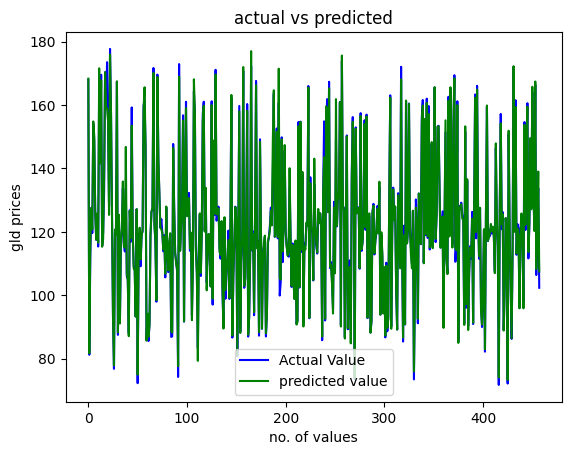

In [ ]:
plt.plot(Y_test, color ='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='predicted value')
plt.title('actual vs predicted')
plt.xlabel('no. of values')
plt.ylabel('gld prices')
plt.legend()
plt.show()